# Light Curve Basics

The examples over at [lightkurve](http://lightkurve.keplerscience.org) are really useful for understanding all the wonderful ways you can access *Kepler* data via online archives. This very short example demonstrates a quick-and-dirty tool that uses `lightkurve` to download the entire *Kepler* light curve for a particular star.

## Download a light curve.

Our first step is to download some data. We'll import our basic set of tools, and then use them to download a Kepler light curve.

In [ ]:
# let's import some common Python packages we like
import matplotlib.pyplot as plt, numpy as np

# let's also import our custom Python package for this class
import henrietta as hsl

This last command creates an object called `hsl` that contains a useful function: `download_kepler_lc`. This function takes a star name as input, and tries its best to return a *Kepler* light curve for it. There are a few options you can feed it if you want, to know what those are, remember that in `jupyter` you can type the name of a function, and then hit `<shift>-<tab>` to see what it does (once for basic info, twice for more). Give it a try!

In [ ]:
hsl.download_kepler_lc

Here, we use that function to download a light curve for Kepler-186. Light curves from Kepler are split into ~90 day quarters; this function makes a rough attempt at stitching all of those together. 

In [ ]:
lc = hsl.download_kepler_lc('Kepler-186')

## Plot your light curve.

The `lc` object we just created it is a `KeplerLightCurve` object (see the documentation for `lightkurve`) if you want to know more about what these objects can do). One snazzy feature of a light curve object like this is that we can make a simple plot of the data, just by running

In [ ]:
lc.plot()

You'll notice that the folks who wrote this tool put a bit of thought into making sure the plot looks pretty good and the axes are labeled in a relatively straightforward way. 

However, we might want to play around with things a bit, so let's dig under the hood of our light curve, and pull out the actual data that's being plotted. 

In [ ]:
# this is the time, in something like Julian Date
time_in_days = lc.time

# this is the relative flux of the star, normalized to the star's median brightness
relative_flux = lc.flux

In [ ]:
N = len(time_in_days)
print("Our light curve contains {} data points!".format(N))

With these arrays, you can start playing around with real Kepler data, either for Kepler-186 or for any other star you choose!

## Using `lightkurve` functions.

You just saw the light curve `.plot()` function. Beyond just that one, there are oodles of built-in functions that we can call directly from that `lc` object. Some are listed below, with explanations from ASTR3400 students! You can also check out the original `lightkurve` documentation over [here](http://lightkurve.keplerscience.org/tutorials/1.03-what-are-lightcurves.html). 

### `lc.plot()`
Chris says "`.plot()` plots the light curve with the normalised flux on the y-axis and the time in days on the x-axis." 

Sebastian added that "it acts much like `matplotlib.pyplot.plot` works, which we are all more than familiar with due to ASTR2600. Any kwargs that you could pass into matplotlib.pylot.plot also work with `.plot()`."

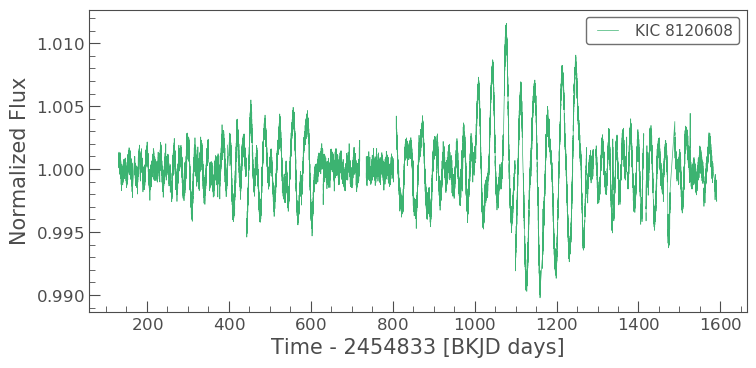

In [7]:
lc.plot(color='mediumseagreen');

### `lc.scatter()`

Zach says "`.scatter()` is almost the same as plot, but instead of connecting each data point with a line, the data are plotted as discrete points." 

Jon points out that it also takes keyword arguments to change the plotting style, just like `matplotlib.pyplot.scatter`. 

These keywords act slightly differently than the ones for `plot`. Notably, with `scatter` the `c=` and `s=` keywords allow you to set the color or size of different points with an array, as shown here.


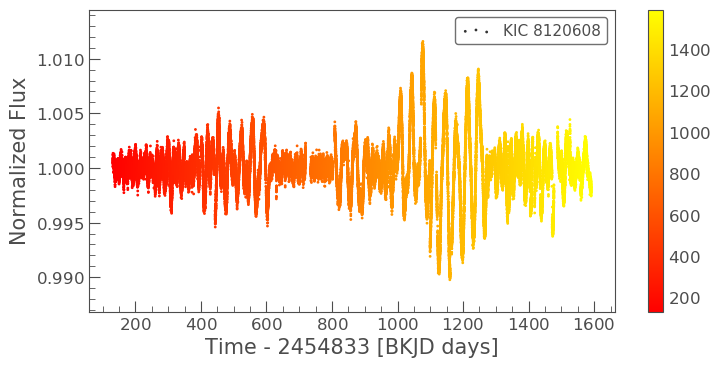

In [8]:
lc.scatter(c=lc.time, cmap='autumn');

### `lc.flatten()`
Diego says "The `.flatten()` function does exactly as one would expect. Two graphs are shown for comparison. One is the regular one and the other is flattened. This is helpful because flattening the graph can get rid of the factors that influence the light curve that comes from the star. Stars look brighter or dimmer depending on where its spots are. This function makes it so the light curve does not reflect that fact." 

Shae adds that `.flatten()` gets rid of wiggles in the light curve "using a Savitzkyâ€“Golay filter (a smoothing technique)". 

Chris noticed that for his transits, "there seems to be a 'lead up' to the transit coming from both sides like the [caldera](https://en.wikipedia.org/wiki/Caldera) of a volcano." This can be caused by the `.flatten()` function, because it tries to smooth out everything as best it can and doesn't know where your transits are, it can sometimes overcorrect near transits.

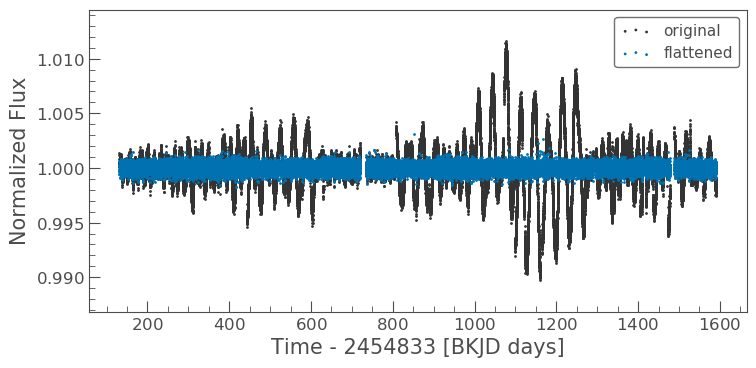

In [9]:
# scatter a light curve
ax = lc.scatter(label='original')

# flatten and scatter a light curve
lc.flatten().scatter(label='flattened', ax=ax);

### `lc.fold()`
Shae says "`.fold()` takes the data and folds it on itself, depending on the specified period given. The y-axis remains as the normalized flux, whereas the x-axis is the phase which represents the time within a single period."

Diego adds "The `.fold()` function takes all the data points and shifts them all over to a certain time period. It is 'folding' in the sense that the data is all piled into one 'area'. This helps to show its transit around its host star."

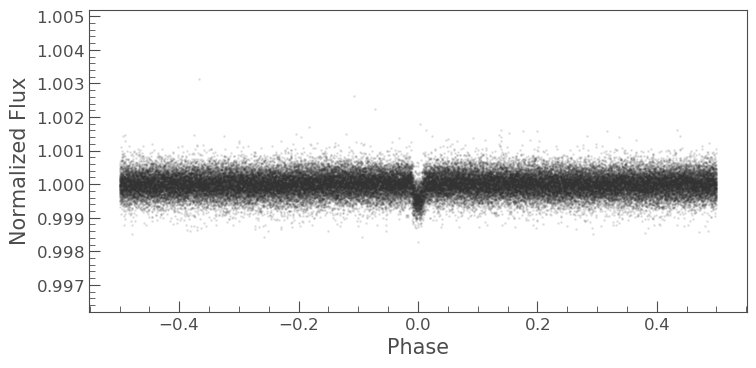

In [10]:
# parameters for Kepler-186b
period = 3.8867907
t0 = 2454966.3304
t0_in_bkjd = t0 - 2454833

# flatten, fold, and scatter a light curve
lc.flatten().fold(period=period, phase=t0_in_bkjd/period).scatter(alpha=0.1);

### `lc.bin()`
Zach says "The function `.bin(binsize=int)` takes a given number of data points and averages them together, returning a new lightcurve with fewer data points. It can be applied to a curve that has already been processed by other functions like `.fold()`.  

Dana explains how it works "If you want a bin size of 50, this takes the first 50 flux measurements and averages them to give one data point, the second point is the second 50, and so on until the function reaches the end of the data." 

Sebastian adds "The process of binning leads to less noise in the data, allowing us to focus much more intensely on the actual patterns in the data that we care about."

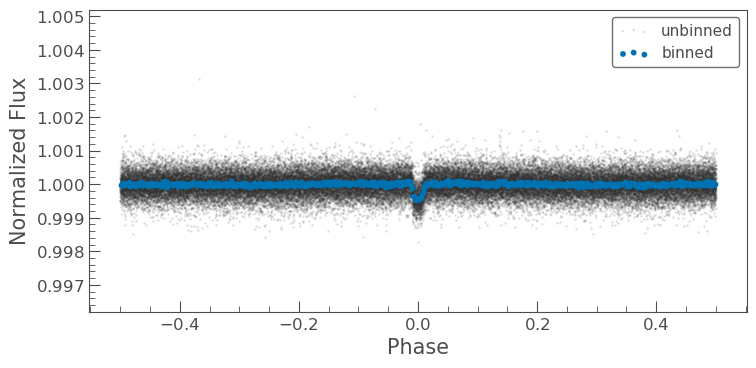

In [11]:
folded = lc.flatten().fold(period=period, phase=t0_in_bkjd/period)

# flatten, fold, and scatter a light curve
ax = folded.scatter(alpha=0.1, label='unbinned')

# flatten, fold, bin, and scatter a light curve
folded.bin(100).scatter(ax=ax, s=10, label='binned');

### `lc.remove_outliers()`

Tyler says "`.remove_outliers(sigma=5.0)` removes the outliers from the data set based on how many standard deviations the value is from the trend. If done incorrectly it can remove transit data." Setting `sigma` to a larger value means that an outlier must be more extreme to be removed.

Dana provides a nice example: "Say you have a list of numbers (3,5,7,2,45,7,9), and you use this function on that set of numbers, it would remove that 45 because it is an outlier and not close to the other numbers."

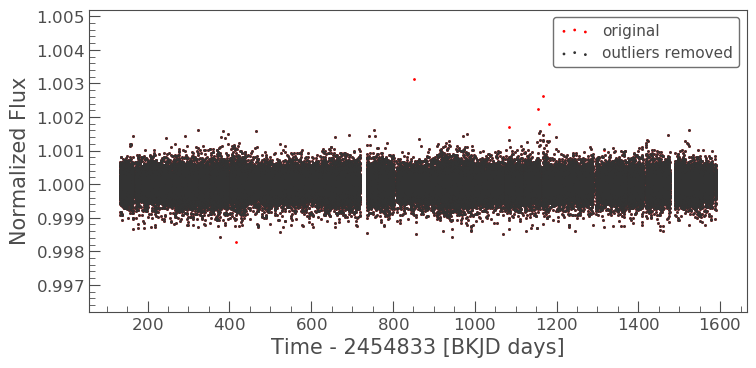

In [12]:
# make a flattened light curve
flattened = lc.flatten()

# scatter the original flattened light curve
ax = flattened.scatter(label='original', color='red')

# scatter the flattened light curve after removing outliers
flattened.remove_outliers().scatter(ax=ax, label='outliers removed');

### `lc.yourownfunction()`

Imagine about what other functions you might like to apply to a light curve. We could write our own `lightkurve` functions. What would they do? If you have an idea, share it with the class!